<a href="https://colab.research.google.com/github/yeongju98/YBIGTA/blob/main/DL%EA%B8%B0%EC%B4%88_19%EA%B8%B0_%EC%A7%80%EC%98%81%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [21]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [22]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

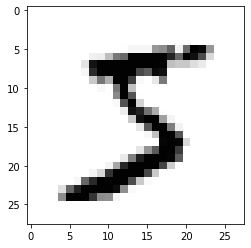

In [23]:
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

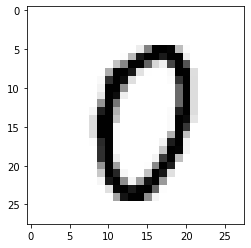

In [24]:
plt.imshow(x_train[1000].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

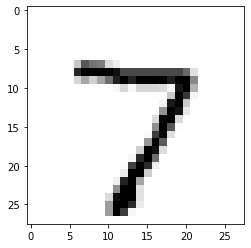

In [25]:
plt.imshow(x_test[0].reshape(28,28)).set_cmap('Greys')

In [6]:
y_train.shape

(60000,)

In [7]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [26]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

In [27]:
x_train.shape

(60000, 784)

#### My Own Model 

In [67]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####

#하단 코드 참조 부탁드립니다!




In [42]:

inputs = keras.Input(shape = (784,))


In [43]:
inputs.shape

TensorShape([None, 784])

In [44]:
inputs.dtype

tf.float32

In [59]:
dense = layers.Dense(28, activation = 'relu')
x = dense(inputs)
x = layers.Dense(28, activation = 'relu')(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

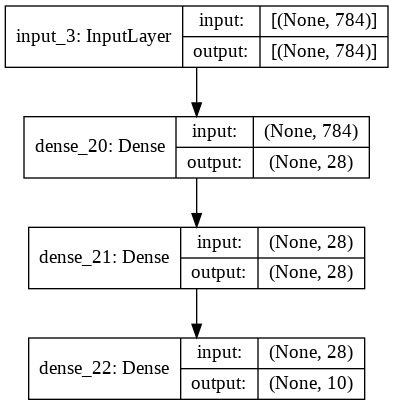

In [60]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [61]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

내가 만든 모델을 확인해 봅시다.

In [62]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_20 (Dense)             (None, 28)                21980     
_________________________________________________________________
dense_21 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                290       
Total params: 23,082
Trainable params: 23,082
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [63]:
def plot_history(history):
    plt.figure(figsize = (10,10))
    for e, (item, value) in enumerate(history.history.items()):
        plt.subplot(2,2,e+1)
        plt.plot(value)
        plt.title(item)
    plt.show()

In [64]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4732 - accuracy: 0.8667 - val_loss: 0.2513 - val_accuracy: 0.9283
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2373 - accuracy: 0.9314 - val_loss: 0.1967 - val_accuracy: 0.9445
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.1984 - accuracy: 0.9428 - val_loss: 0.1795 - val_accuracy: 0.9478
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1704 - accuracy: 0.9498 - val_loss: 0.1670 - val_accuracy: 0.9519
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1497 - accuracy: 0.9556 - val_loss: 0.1562 - val_accuracy: 0.9555
Epoch 6/10
750/750 [==============================] - 1s 2ms/step - loss: 0.1329 - accuracy: 0.9606 - val_loss: 0.1514 - val_accuracy: 0.9572
Epoch 7/10
750/750 [==============================] - 1s 2ms/step - loss: 0.1199 - accuracy: 0.9643 - val_loss: 0.1407 - val_accuracy: 0.9612
Epoch 

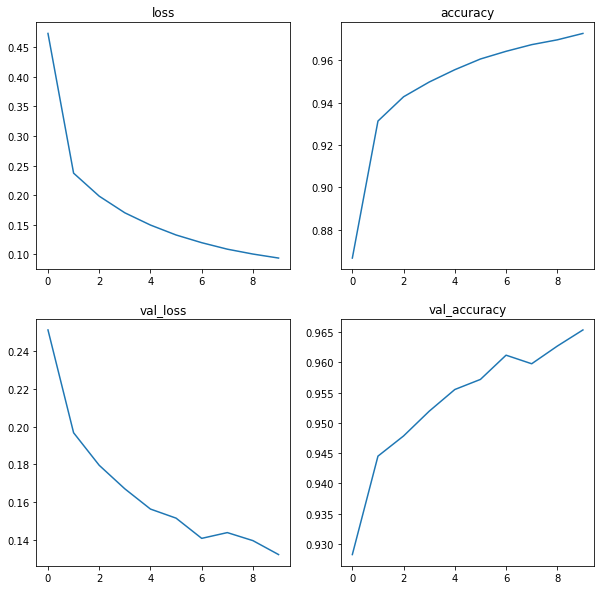

In [65]:
plot_history(history)

95%이상의 성능을 가진 모델을 만들면 완성!

In [66]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 0s - loss: 0.1295 - accuracy: 0.9635

Accuracy: 0.9635000228881836


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)